# Predicción del resultado de partidas de ajedrez a partir de su metadata.

**Palabras clave:**

- **ELO:** valor numérico que determina la fuerza de un jugador de ajedrez. En Costa Rica, se inicia con 1400 puntos y se alcanza la Primera División con un ELO de 2000, mientras que el campeón nacional tiene una fuerza cercana a 2400. El campeón del mundo, actualmente, posee un ELO de 2855. 
- **Lichess:** sitio web *open-source* muy popular para jugar ajedrez en línea, con millones de partidas jugadas cada mes. En Internet, los ELOs tienden a ser más altos (debido a las mecánicas que utilizan las páginas para calcularlo).
- **Apertura:** primeras jugadas que se realizan en una partida de ajedrez. Típicamente, corresponde a las primeras 10 o 15 movidas.
- **ECO:** *Encyclopedia of Chess Openings*; clasificación alfanumérica para todas las aperturas posibles en el ajedrez. Cada código consta de una letra (de la A a la E) seguida de dos dígitos.
- **Control de tiempo:** minutos que posee cada jugador para la partida. Una partida *bullet* significa 1 minuto por jugador; una partida *blitz* consta de 5 minutos por jugador.
- **Tablas:** empate en ajedrez.
- **PGN:** *Portable Game Notation*; extensión de archivo especializado para programas diseñados para trabajar con material de ajedrez.

## 1. Descripción del problema y justificación del enfoque a utilizar

Con base en las características de una partida de ajedrez (ELO de sus jugadores, apertura jugada, control de tiempo empleado, cantidad de jugadas, entre otros) se desea predecir quién ganó el juego. Para esto, se utilizarán técnicas de aprendizaje automático para clasificación binaria, donde "1" significa victoria de las Blancas, mientras que "0" significa victoria de las Negras. En este trabajo, no se tomarán en cuenta las partidas que terminaron en tablas, por lo que una clasificación binaria se ajusta bien al escenario planteado.

### Dataset a utilizar

Se utilizará un *dataset* obtenido de la página [Lichess.org](https://lichess.org/), con cerca de 20 000 partidas jugadas en septiembre del 2017. El *dataset* fue convertido de PGN a CSV por un usuario de Kaggle y se encuentra disponible en dicha página.

Puede encontrar el conjunto de datos a utilizar haciendo click en este [enlace](https://www.kaggle.com/datasnaek/chess).

## 2. Preprocesamiento y limpieza de datos

El preprocesamiento y limpieza de datos fue llevado a cabo con **OpenRefine**. Se adjunta en el repositorio el archivo *.json* con todos los cambios realizados al conjunto de datos.

### 2.a Eliminar todas las columnas que no se utilizarán.

Para disminuir el ruido que entrará al modelo de aprendizaje automático, se eliminaron todas las columnas en el *dataset* original que no se estudiarán en este trabajo. En específico, se eliminaron los siguientes *features*:

- id.
- created_at.
- last_move_at.
- victory_status.
- white_id.
- black_id. 
- opening_name.
- opening_ply.

### 2.b Eliminar todas las partidas cuyo resultado terminó en tablas.

Seguidamente, se eliminaron todas las filas cuyo valor en la columna *winner* era "draw". Para esto, se utilizó un *text facet* que encontró todas las filas *draw* y se removieron del conjunto de datos. Se eliminaron 950 filas, lo que representa el 4.74% del total de datos. Esto se realizó por tres razones:

1. Es un porcentaje lo suficientemente bajo como para justificar su eliminación del conjunto de datos.
2. En el presente trabajo, interesa construir un modelo que pueda predecir el ganador de una partida, no las posibilidades de entablar.
3. Al eliminar esta tercera opción como un posible resultado, se simplifica el problema de una clasificación multiclase a una clasificación binaria.

### 2.c Reordenar las columnas.

Para simplificar el código, se colocó la columna de respuesta (*winner*) en el extremo derecho del conjunto de datos.

## 3. Transformación de Datos

La transformación de datos fue llevada a cabo con **OpenRefine**. Se adjunta en el repositorio el archivo *.json* con todos los cambios realizados al conjunto de datos.

### 3.a Convertir columna *rated* a valor numérico.

La columna *rated* indica si el juego afectará el rating (es decir, el ELO) de los jugadores. Originalmente, sus valores eran strings de "TRUE" o "FALSE". Para convertir de estos valores categóricos a valores numéricos, se utilizó el siguiente código GREL:

```
if(value == "FALSE",0,1)
```

### 3.b Convertir columna *increment_code* a valor numérico.

El *feature* *increment_code* indica el control de tiempo de la partida. Por ejemplo, valor de "15+10" indica que cada jugador inicia con 15 minutos y, cada vez que realiza un movimiento, se le añaden 10 segundos. Para convertir esta cadena de texto a un valor numérico, se eliminó el incremento (es decir, los segundos que se obtienen con cada jugada) y dejar únicamente el tiempo base (los minutos). Para esto, se utilizó el siguiente código GREL:

```
value.replace(/\+.*/,'')
```

### 3.c Cambiar *opening_eco* a valor numérico.

El código ECO representa dos problemas para los modelos de aprendizaje automático: 1. es un valor alfanumérico; 2. existen 500 valores posibles. En este trabajo, se decidió simplificar el código ECO y agrupar por el primer símbolo, es decir, la letra (A,B,C,D o E) que se encuentra al inicio del código. Luego, se le asignó un número a cada letra (A = 1, B = 2, etc) para poder tener una entrada numérica en el modelo. De esta forma, un código ECO de A66 y otro de A32 terminarán con el mismo valor: 1.

Esta transformación se basa en la agrupación propia de los códigos ECO: las aperturas de la clase "A" son aperturas de flanco; la clase "B" contiene a las aperturas semiabiertas; el Gambito de Dama, por ejemplo, se encuentra en la clase "D". De esta forma, las aperturas bajo una misma letra en el código ECO no son tan distintas entre sí, lo que permite agruparlas para facilitar la transformación de datos. Para lograr esto, se utilizó el siguiente código GREL:

```
if(value.startsWith("A"),1,if(value.startsWith("B"),2,if(value.startsWith("C"),3,if(value.startsWith("D"),4,5))))
```



Luego del preprocesamiento y transformación de datos, se tienen los siguientes *features* con los que se trabajará:

- isRated.
- turns.
- timeControl.
- whiteRating.
- blackRating.
- openingECO.
- winner.

## 4. Análisis Exploratorio de Datos

### 4.a Histograma de *whiteRating*.

### 4.b Histograma de *winner*.

### 4.c Histograma de *timeControl*.

### 4.d Histograma de *openingECO*.

### 4.c *Boxplot* de *blackRating*.

### 4.b Diagrama de dispersión entre *blackRating* y *winner*.

Se cargan los datos desde la computadora local.

In [1]:

from google.colab import files
import pandas as pd
uploaded = files.upload()
data = pd.read_excel('ChessGames.xlsx')
data.to_csv(encoding='utf-8', index=False)
data.head()

Saving ChessGames.xlsx to ChessGames.xlsx


,isRated,turns,timeControl,whiteRating,blackRating,openingECO,winner
0,0,13,15,1500,1191,4,1
1,1,16,5,1322,1261,2,0
2,1,61,5,1496,1500,3,1
3,1,61,20,1439,1454,4,1
4,1,95,30,1523,1469,3,1


## 4.a Análisis Descriptivo

#### 4.a.1 Histograma de *whiteRating*

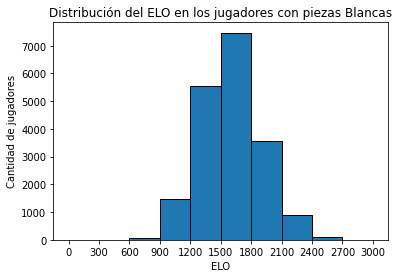

In [10]:
import matplotlib.pyplot as plt
plt.title('Distribución del ELO en los jugadores con piezas Blancas')
plt.xlabel('ELO')
plt.ylabel('Cantidad de jugadores')
bins= [0,300,600,900,1200,1500,1800,2100,2400,2700,3000]
plt.hist(data['whiteRating'], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

#### 4.a.2 Histograma de *winner*